# 0. Install and Import Dependencies

In [17]:
!pip install stable-baselines3 gym-anytrading gymnasium sb3-contrib

In [20]:
# Gym Environment Imports
import gymnasium as gym
import gym_anytrading

# Stable-Baselines3 Imports
from stable_baselines3 import A2C
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Other Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load MarketWatch Data

NVIDIA Corp. Historical Quotes from 10/30/2023 to 10/28/2024

In [3]:
df = pd.read_csv('data/NVDA.csv')

In [4]:
df = df.iloc[::-1]
df.head()

,Date,Open,High,Low,Close,Volume
251,10/31/2023,40.45,40.88,39.23,40.78,"517,968,705"
250,11/01/2023,40.88,42.38,40.87,42.33,"437,592,886"
249,11/02/2023,43.33,43.88,42.89,43.51,"409,171,906"
248,11/03/2023,44.02,45.31,43.72,45.01,"424,609,606"
247,11/06/2023,45.28,45.94,44.90,45.75,"400,733,396"


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-10-31,40.45,40.88,39.23,40.78,"517,968,705"
2023-11-01,40.88,42.38,40.87,42.33,"437,592,886"
2023-11-02,43.33,43.88,42.89,43.51,"409,171,906"
2023-11-03,44.02,45.31,43.72,45.01,"424,609,606"
2023-11-06,45.28,45.94,44.90,45.75,"400,733,396"


In [7]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'forex-v0', 'stocks-v0'])

In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, len(df)-1), window_size=5)

In [9]:
env.signal_features

/Users/danielgiaoo/Developer/GitHub/python-trading-bot-reinforcement-learning/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 4.0780e+01,  0.0000e+00],
       [ 4.2330e+01,  1.5500e+00],
       [ 4.3510e+01,  1.1800e+00],
       [ 4.5010e+01,  1.5000e+00],
       [ 4.5750e+01,  7.4000e-01],
       [ 4.5960e+01,  2.1000e-01],
       [ 4.6570e+01,  6.1000e-01],
       [ 4.6950e+01,  3.8000e-01],
       [ 4.8340e+01,  1.3900e+00],
       [ 4.8620e+01,  2.8000e-01],
       [ 4.9660e+01,  1.0400e+00],
       [ 4.8890e+01, -7.7000e-01],
       [ 4.9480e+01,  5.9000e-01],
       [ 4.9300e+01, -1.8000e-01],
       [ 5.0410e+01,  1.1100e+00],
       [ 4.9940e+01, -4.7000e-01],
       [ 4.8720e+01, -1.2200e+00],
       [ 4.7780e+01, -9.4000e-01],
       [ 4.8240e+01,  4.6000e-01],
       [ 4.7820e+01, -4.2000e-01],
       [ 4.8140e+01,  3.2000e-01],
       [ 4.6770e+01, -1.3700e+00],
       [ 4.6770e+01,  0.0000e+00],
       [ 4.5510e+01, -1.2600e+00],
       [ 4.6570e+01,  1.0600e+00],
       [ 4.5500e+01, -1.0700e+00],
       [ 4.6600e+01,  1.1000e+00],
       [ 4.7510e+01,  9.1000e-01],
       [ 4.6630e+01,

# 2. Test Environment

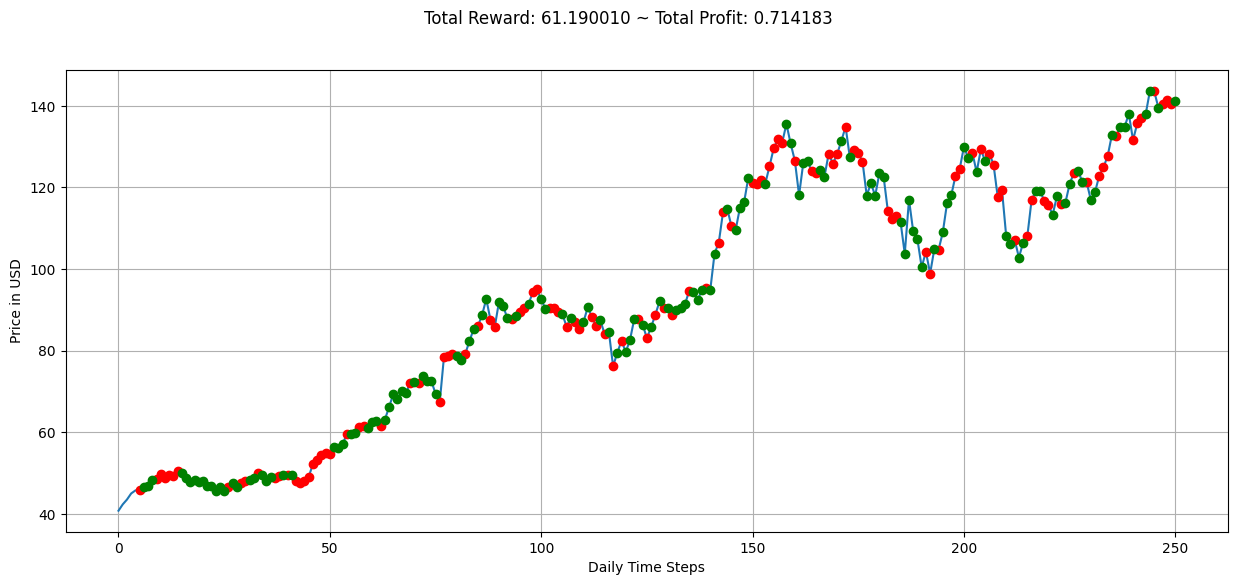

In [12]:
state = env.reset()
done = False
truncated = False

while not (done or truncated):
    # Take a random action
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.xlabel('Daily Time Steps')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

Notice : A Total Profit of 0.714183 indicates that by taking random actions, we are loosing money. To be in the money, Total Profit must be greater than 1.

# 3. Train RL Agent

In [13]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, len(df)-1), window_size=5)
env = DummyVecEnv([env_maker])

In [21]:
model = RecurrentPPO("MlpLstmPolicy", env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2175 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 128  |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 355           |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 256           |
| train/                  |               |
|    approx_kl            | 0.0029551303  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | -0.0031466484 |
|    learning_rate        | 0.0003        |
|    loss                 | 10.1          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00237      |
|    value_loss           | 27.7          |
-------------------------